<a href="https://colab.research.google.com/github/K-Kilel/KNN-ALGORITHIM-AND-NAIVE-BAYES-MODELS/blob/main/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**RESEARCH QUESTION**

Create a model that predict if a passenger in the titanic survived or not. 

**METRIS FOR SUCCESS**

Create a model with a 70% prediction accuracy.

**UNDERSTANDING THE CONTEXT**

RMS Titanic was a British passenger liner, operated by the White Star Line, which sank in the North Atlantic Ocean on 15 April 1912 after striking an iceberg during her maiden voyage from Southampton, UK, to New York City.

**EXPERIMENTAL DESIGN**

Import the relevant libraries that we will use in our analysis.

Import the datasets and check the data.

Find and deal with outliers and missing data within the dataset.

Perform univariate and bivariate analysis while recording our observations.

Implement the solution by using the KNN classifier algorithm to predict whether a passenger survived in the Titanic crash considering the 80-20, 70-30 and 60-40 test size split

Challenge the solution by giving insights on how we can optimize the model to give us a better performance


**DATA RELEVANCE**

The dataset used was obtained from kaggle using the following links:

https://archive.org/download/train5_202002/train%20%285%29.csv

https://archive.org/download/test1_202002/test%20%281%29.csv

### **Reading the Data**

In [117]:
# Importing libraries that will be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report


In [38]:
df_train = pd.read_csv('train (5).csv')


In [39]:
df_test = pd.read_csv('test (1).csv')

### **Checking the Data**

In [40]:
# Previewing the top 5 records
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
# Previewing the top 5 records
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [42]:
# Previewing the bottom records
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [43]:
# Previewing the bottom records
df_test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [44]:
# Determing the number of records
print('The train dataset has',df_train.shape[0], 'rows and', df_train.shape[1], 'columns.')

The train dataset has 891 rows and 12 columns.


In [45]:
# Determing the number of records
print('The test dataset has',df_test.shape[0], 'rows and', df_test.shape[1], 'columns.')

The test dataset has 418 rows and 11 columns.


In [46]:
# Checking the data types of each column

df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [65]:
# Converting Age column to int

df_train = df_train.astype({'Age': int})

### **Datasets Information**

Survived - Survival (0 = No; 1 = Yes)

Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

Name - Name

Sex - Sex

Age - Age

SibSp - Number of Siblings/Spouses Aboard

Parch - Number of Parents/Children Aboard

Ticket - Ticket Number

Fare - Passenger Fare (British pound)

Cabin - Cabin

Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

### **Tidying the Dataset**

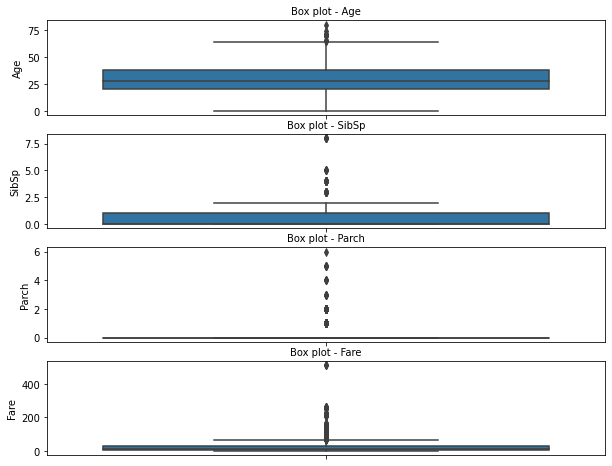

In [47]:
# Checking for Outliers

col_names = ['Age', 'SibSp', 'Parch', 'Fare']

fig, ax = plt.subplots(len(col_names), figsize=(10,8))

for i, col_val in enumerate(col_names):

    sns.boxplot(y= df_train[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    #ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

There are outliers on the numerical columns. We will not delete the outliers because they are justified.
1. For Age column, we could have people that are older than 70 years.
2. For SibSp and Parch, the dataset could have a whole family of more than 2 people.
3. For Fare, the fare range depends on several factors such as Cabin, port and passenger class.

In [48]:
# Checking for duplicates

print('There are', df_train.duplicated().sum(), 'duplicates in our dataset.')


There are 0 duplicates in our dataset.


In [49]:
# Checking for missing values

df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The age has 177 null values, Cabin has 687 and Embarked has 2 null values.

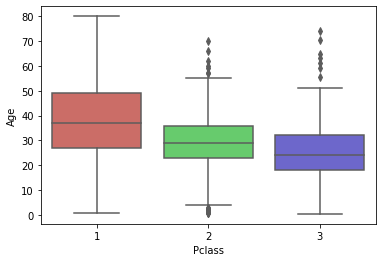

In [50]:
# Dealing with missing values on the Age Column. 
# Replace the null values with mean age in each passenger class.
# Visualizing the passenger class and age 

sns.boxplot(x='Pclass', y='Age', data=df_train, palette='hls')

In [51]:
# Finding the mean age according to passenger class
df_train.groupby('Pclass').agg({'Age':[ 'mean']})

,Age
,mean
Pclass,
1,38.233441
2,29.877630
3,25.140620


In [54]:
# Replacing the null values with mean age in each passenger class.

def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 30
        elif Pclass == 3:
            return 25
    else:
        return Age

df_train.Age= df_train[['Age', 'Pclass']].apply(impute, axis=1)

# Checking to confirm the changes

df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [55]:
# The Cabin column that has most null values will be dropped as it will affect the accuracy of the model.

df_train.drop(['Cabin'], axis = 1, inplace= True)

In [56]:
# The two missing values in Embark will be dropped

df_train.dropna(inplace=True)

In [66]:
# Checking the clean dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    int64  
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(1), int64(6), object(4)
memory usage: 83.3+ KB


In [67]:
# For consistency and easy reference the columns should be uniform
# Changing all column names to lower case

df_train.columns = df_train.columns.str.lower()

# Previewing the columns to confirm whether the changes have taken effect
#
df_train.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'embarked'],
      dtype='object')

### **Exploratory Data Analysis**

1. **Univariate Analysis**

In [79]:
# Central Tendencies

# Mode

num_cols = df_train[['age', 'sibsp', 'parch', 'fare']]
num_cols.mode()

,age,sibsp,parch,fare
0,25,0,0,8.05


Most people from our data were aged 25 years.
Most passengers did not have siblings or parents accompanying them.

In [80]:
# Finding Mean

num_cols.mean()

age      29.190101
sibsp     0.524184
parch     0.382452
fare     32.096681
dtype: float64

The average age was 29 years.

In [81]:
# Finding Median

num_cols.median()

age      26.0000
sibsp     0.0000
parch     0.0000
fare     14.4542
dtype: float64

In [82]:
# Measure of Dispersion

# Finding Variance
num_cols.var()

age       173.870352
sibsp       1.218164
parch       0.650863
fare     2469.841935
dtype: float64

In [83]:
# Finding Standard Deviation
num_cols.std()

age      13.185991
sibsp     1.103705
parch     0.806761
fare     49.697504
dtype: float64

In [84]:
# Finding the Skewness 
num_cols.skew()

age      0.509112
sibsp    3.691058
parch    2.745160
fare     4.801440
dtype: float64

In [85]:
# Finding kurtosis
num_cols.kurt()

age       0.807139
sibsp    17.838972
parch     9.750592
fare     33.508477
dtype: float64

In [78]:
# Categorical data
#Frequency table for the categorical data


print(df_train['embarked'].value_counts())
print('\n')
print(df_train['pclass'].value_counts())
print('\n')
print(df_train['survived'].value_counts())
print('\n')
print(df_train['sex'].value_counts())

S    644
C    168
Q     77
Name: embarked, dtype: int64


3    491
1    214
2    184
Name: pclass, dtype: int64


0    549
1    340
Name: survived, dtype: int64


male      577
female    312
Name: sex, dtype: int64




*   Most passengers embarked Southampton, then Cherbourg and lastly Quenstown.
*   Most of the passengers in our dataset, were in 3rd Class and the least were in 2nd Class.
*   Most passengers from our dataset survived(549).
*   From our dataset, most passengers were male(577) compared to female(312).





### **Bivariate Analysis**

In [90]:
# Checking surviving status according to sex
df_train[['survived','sex']].value_counts(sort = False)

survived  sex   
0         female     81
          male      468
1         female    231
          male      109
dtype: int64

Text(0.5, 1.0, 'Surviving Status According to Sex')

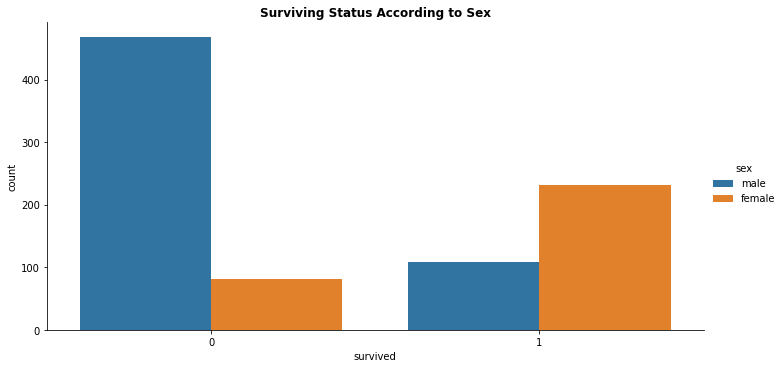

In [93]:
#Surviving status according to Sex
sns.catplot(x='survived',hue='sex',data=df_train,kind='count',aspect=2)
plt.title('Surviving Status According to Sex',weight='bold')

Most male passengers did not survive the accident. Most females however survived compared to the male.

In [94]:
# Checking surviving status according to passenger class
df_train[['survived','pclass']].value_counts(sort = False)

survived  pclass
0         1          80
          2          97
          3         372
1         1         134
          2          87
          3         119
dtype: int64

Text(0.5, 1.0, 'Surviving Status According to Passenger Class')

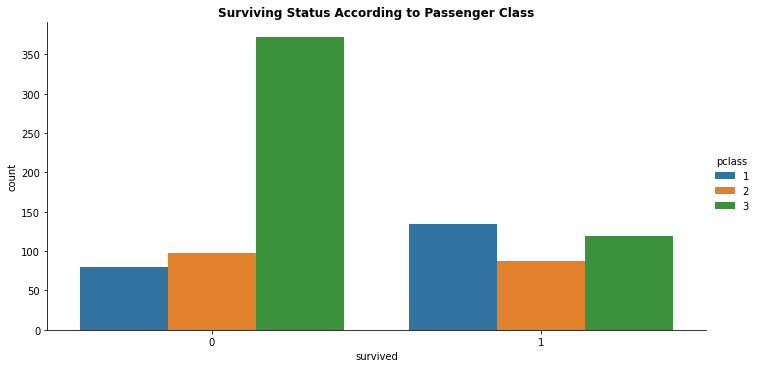

In [96]:
sns.catplot(x='survived',hue='pclass',data=df_train,kind='count',aspect=2)
plt.title('Surviving Status According to Passenger Class',weight='bold')

Most survivors were in the first class while most passengers in the 3rd class did not survive.

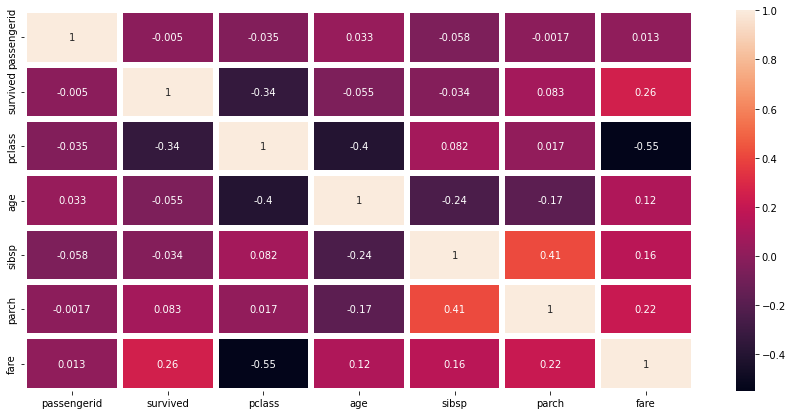

In [103]:
# Checking the correlation
plt.figure(figsize=(15,7))
sns.heatmap(df_train.corr(),linewidths=5, annot=True)

From the heatmap above, there are no features that are strongly correlated. 

Passenger class and fare are weakly negatively correlated.

In [104]:
#Checking multicollinearity
# Pick independent variables only.
independent=df_train.drop(columns=["survived"])

# Let's display the correlations between the variables
correlations=independent.corr()
correlations

,passengerid,pclass,age,sibsp,parch,fare
passengerid,1.000000,-0.035330,0.032655,-0.057686,-0.001657,0.012703
pclass,-0.035330,1.000000,-0.401044,0.081656,0.016824,-0.548193
age,0.032655,-0.401044,1.000000,-0.242163,-0.174100,0.118798
sibsp,-0.057686,0.081656,-0.242163,1.000000,0.414542,0.160887
parch,-0.001657,0.016824,-0.174100,0.414542,1.000000,0.217532
fare,0.012703,-0.548193,0.118798,0.160887,0.217532,1.000000


In [105]:
# Checking for multicollinearity using the VIF 
vif= pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)
vif

,passengerid,pclass,age,sibsp,parch,fare
passengerid,1.004974,0.024701,-0.011671,0.064747,-0.027110,-0.002359
pclass,0.024701,1.736979,0.541155,-0.122918,-0.085439,0.925960
age,-0.011671,0.541155,1.275361,0.204610,0.108800,0.088709
sibsp,0.064747,-0.122918,0.204610,1.282197,-0.450023,-0.200907
parch,-0.027110,-0.085439,0.108800,-0.450023,1.263870,-0.261947
fare,-0.002359,0.925960,0.088709,-0.200907,-0.261947,1.586402


##### There is no high correlation between variables as all VIFs are below 5. 

### **Implementing the Solution**

In [107]:
df_train.drop(['name', 'ticket', 'passengerid'], axis = 1, inplace=True)

In [109]:
# Encoding the two categorical columns using Label Encoder

from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

df_train['sex'] = labelencoder.fit_transform(df_train['sex'])
df_train['embarked'] = labelencoder.fit_transform(df_train['embarked'])

In [110]:
X = df_train.drop(['survived'], axis =1)
y = df_train['survived']

##### **a) 80-20 test size split**

In [111]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature scaling using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [113]:
# Hypeparameter tuning

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

params = { 'n_neighbors' : [5,7,9,11,13,15],
            'weights' : ['uniform','distance'],
             "p":[1,2],
            'weights': ['uniform','distance'],
             "leaf_size" : [1,2,3,4,5],
             'metric' : ['minkowski','euclidean','manhattan']}
knn = KNeighborsClassifier()

# Fitting the model with the best parameters
model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'leaf_size': 1,
 'metric': 'minkowski',
 'n_neighbors': 13,
 'p': 1,
 'weights': 'uniform'}

In [118]:
# Fitting our model


clf = KNeighborsClassifier(leaf_size=1,metric="minkowski",n_neighbors= 13,p= 1,weights='uniform')
clf.fit(X_train, y_train)

# Predicting

y_pred= clf.predict(X_test)

# The confusion_matrix and classification_report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[88 17]
 [29 44]]
              precision    recall  f1-score   support

           0       0.75      0.84      0.79       105
           1       0.72      0.60      0.66        73

    accuracy                           0.74       178
   macro avg       0.74      0.72      0.72       178
weighted avg       0.74      0.74      0.74       178








---



---


*   In the confusion matrix, 88 were predicted accurately for those that did not survive while 29 were not predicted accurately. For those that survived, 44 was predicted accurately and 17 were not accurately predicted.




---


*   In the classification report:

*   Class 0 has a higher precision compared to class 1.

*   Class 0 has a higher recall compared to class 1.
*   The accuracy of the model is 74%


---



---

















##### **b) 70-30 test size split**

In [119]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Feature scaling using Standard Scaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [120]:
params = { 'n_neighbors' : [5,7,9,11,13,15],
            'weights' : ['uniform','distance'],
             "p":[1,2],
            'weights': ['uniform','distance'],
             "leaf_size" : [1,2,3,4,5],
             'metric' : ['minkowski','euclidean','manhattan']}
knn = KNeighborsClassifier()

# Fitting the model with the best parameters
model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'leaf_size': 1,
 'metric': 'minkowski',
 'n_neighbors': 11,
 'p': 1,
 'weights': 'uniform'}

In [121]:
# Fitting our model


clf = KNeighborsClassifier(leaf_size=1,metric="minkowski",n_neighbors= 11,p= 1,weights='uniform')
clf.fit(X_train, y_train)

# Predicting

y_pred= clf.predict(X_test)

# The confusion_matrix and classification_report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[140  17]
 [ 39  71]]
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       157
           1       0.81      0.65      0.72       110

    accuracy                           0.79       267
   macro avg       0.79      0.77      0.78       267
weighted avg       0.79      0.79      0.79       267








---



---


*   In the confusion matrix, 140 were predicted accurately for those that did not survive while 39 were not predicted accurately. For those that survived, 71 was predicted accurately and 17 were not accurately predicted.




---


*   In the classification report:

*   Class 1 has a higher precision compared to class 0.

*   Class 0 has a higher recall compared to class 1.
*   The accuracy of the model is 79%


---



---


##### **c) 60-40 test size split**

In [122]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Feature scaling using Standard Scaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [123]:
params = { 'n_neighbors' : [5,7,9,11,13,15],
            'weights' : ['uniform','distance'],
             "p":[1,2],
            'weights': ['uniform','distance'],
             "leaf_size" : [1,2,3,4,5],
             'metric' : ['minkowski','euclidean','manhattan']}
knn = KNeighborsClassifier()

# Fitting the model with the best parameters
model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'leaf_size': 1,
 'metric': 'minkowski',
 'n_neighbors': 11,
 'p': 2,
 'weights': 'uniform'}

In [124]:
# Fitting our model


clf = KNeighborsClassifier(leaf_size=1,metric="minkowski",n_neighbors= 11,p= 2,weights='uniform')
clf.fit(X_train, y_train)

# Predicting

y_pred= clf.predict(X_test)

# The confusion_matrix and classification_report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[191  25]
 [ 50  90]]
              precision    recall  f1-score   support

           0       0.79      0.88      0.84       216
           1       0.78      0.64      0.71       140

    accuracy                           0.79       356
   macro avg       0.79      0.76      0.77       356
weighted avg       0.79      0.79      0.78       356








---



---


*   In the confusion matrix, 191 were predicted accurately for those that did not survive while 50 were not predicted accurately. For those that survived, 90 was predicted accurately and 25 were not accurately predicted.




---


*   In the classification report:

*   Class 0 has a higher precision compared to class 1.

*   Class 0 has a higher recall compared to class 1.
*   The accuracy of the model is 79%


---



---


The 70-30 and the 60-40 test size split model have high accuracy of 79% compared to the 80-20 test size split.

### **Challenging the Solution**

In [125]:
# Reviewing the Solution 
# Let's fit the model on Random Forest Classifier to challenge our solution

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)


from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=5)
forest = forest.fit(X_train, y_train)

# Predicting
y_pred = forest.predict(X_test)

from sklearn import metrics


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.3003919044060917
Mean Squared Error: 0.17928645086384165
Root Mean Squared Error: 0.42342230794307667


### **a). Did we have the right data?**

Yes, we had the right data to create the model.

### **b). Do we need other data to answer our question?**

The data had sufficient features for creating a model.

### **c). Did we have the right question?**

Yes, we had the right question.